In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
dlp_df = pd.read_excel("dlp.xlsx")
# dlp_df=dlp_df.drop(columns=["carotid_H", "carotid_L", "all_H"])
dlp_df.head()

,kiterjesztett,carotid_L,carotid_H,all_H,hagyományos
0,1466.93,959.21,1269.62,1976.8,1661.9
1,1386.19,1157.60,1292.95,1801.1,1397.4
2,1195.31,993.31,1409.16,1689.3,1272.7
3,1237.64,977.54,1221.23,1950.9,1325.8
4,1415.36,1027.97,1311.60,1893.5,1344.8


In [100]:
all_df = dlp_df[['hagyományos', 'kiterjesztett']]
df_melt = pd.melt(all_df.reset_index(), id_vars=['index'], value_vars=['hagyományos', 'kiterjesztett'])
df_melt.columns = ['index', 'Csoport', 'DLP (mGy*cm)']
df_melt.head()

,index,Csoport,DLP (mGy*cm)
0,0,hagyományos,1661.9
1,1,hagyományos,1397.4
2,2,hagyományos,1272.7
3,3,hagyományos,1325.8
4,4,hagyományos,1344.8


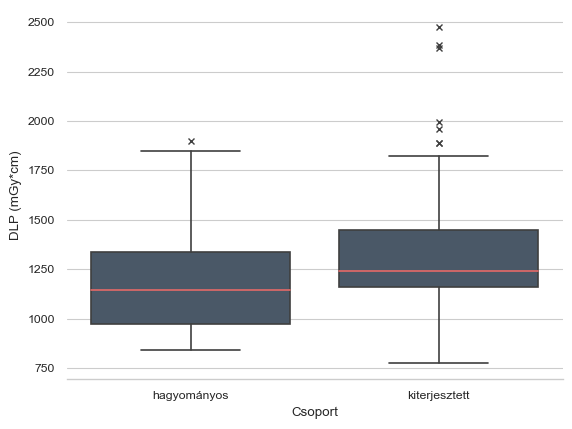

In [101]:
sns.set_style('whitegrid')
sns.set_context('paper')
ax = sns.boxplot(x='Csoport', y='DLP (mGy*cm)', data=df_melt, 
                flierprops={"marker": "x"}, 
                medianprops={"color": "#e46a68"}, 
                boxprops={"facecolor": "#4a5867"})
sns.despine(left=True)
plt.show()

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
model = ols('DLP ~ C(Dose_group)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Dose_group),8.847354e+06,4.0,25.717548,6.972802e-19
Residual,3.276792e+07,381.0,NaN,NaN


In [50]:
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=df_melt, res_var='DLP', xfac_var='Dose_group', anova_model='DLP ~ C(Dose_group)')
res.tukey_summary

/usr/local/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,kiterjesztett,carotid_L,368.285311,222.810173,513.760450,9.813103,0.001000
1,kiterjesztett,carotid_H,95.804294,-36.402515,228.011102,2.808936,0.274749
2,kiterjesztett,all_H,104.671651,-16.315508,225.658809,3.353517,0.125198
3,kiterjesztett,all_L,181.180178,58.391402,303.968954,5.719562,0.001000
4,carotid_L,carotid_H,272.481017,121.855661,423.106374,7.012113,0.001000
5,carotid_L,all_H,472.956962,332.076692,613.837231,13.013142,0.001000
6,carotid_L,all_L,187.105133,44.674655,329.535612,5.092060,0.003292
7,carotid_H,all_H,200.475945,73.342650,327.609239,6.112427,0.001000
8,carotid_H,all_L,85.375884,-43.473119,214.224887,2.568413,0.366472
9,all_H,all_L,285.851828,168.543185,403.160472,9.445429,0.001000


In [53]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(df_melt['DLP'], df_melt['Dose_group'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
all_H,all_L,nan,nan,nan,False
all_H,carotid_H,nan,nan,nan,False
all_H,carotid_L,nan,nan,nan,False
all_H,kiterjesztett,nan,nan,nan,False
all_L,carotid_H,nan,nan,nan,False
all_L,carotid_L,nan,nan,nan,False
all_L,kiterjesztett,nan,nan,nan,False
carotid_H,carotid_L,nan,nan,nan,False
carotid_H,kiterjesztett,nan,nan,nan,False
carotid_L,kiterjesztett,nan,nan,nan,False
